In [1]:
# Import necessary libraries for machine learning and visualization
import pandas as pd                           
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree             
from sklearn.ensemble import RandomForestClassifier                   
from sklearn.metrics import accuracy_score                             
import matplotlib.pyplot as plt                   


In [2]:
# Load the dataset from GitHub (you can use Kaggle dataset as well)
url = r"C:\Users\garik\Downloads\heart.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("Sample Data:")
print(data.head())


Sample Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
# Separate features (X) and target (y)
X = data.drop('target', axis=1)   # Features
y = data['target']                # Target column


In [7]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a Decision Tree with max_depth = 3 to avoid overfitting
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)  # Fit the model to training data


DecisionTreeClassifier(max_depth=3, random_state=42)

In [11]:
# Predict on the test data
y_pred_dt = dt.predict(X_test)

# Print accuracy of the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7804878048780488


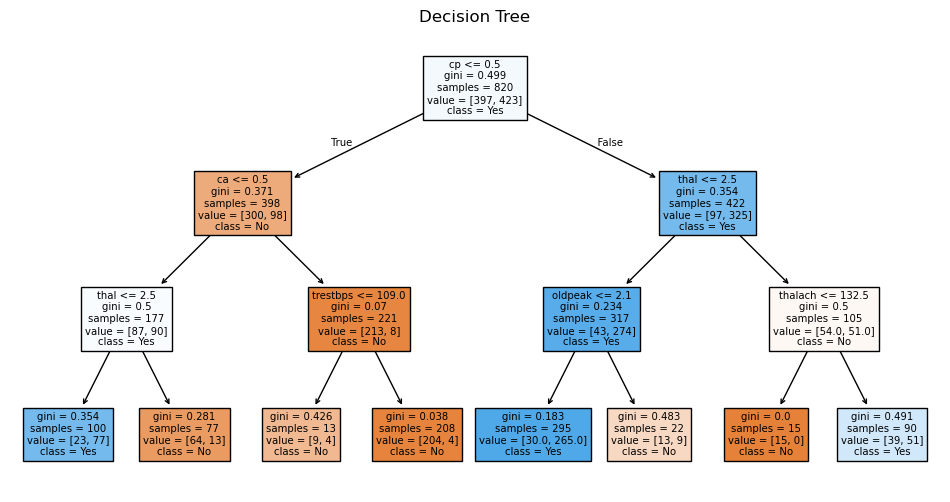

In [13]:
# Plot the trained decision tree
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree")
plt.show()


In [15]:
# Train a Random Forest Classifier with 100 decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Fit the model


RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Print accuracy of the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


In [19]:
# Show how important each feature is in prediction
importances = rf.feature_importances_

# Print each feature and its importance score
print("Feature Importances:")
for feature, score in zip(X.columns, importances):
    print(f"{feature}: {score:.4f}")


Feature Importances:
age: 0.0779
sex: 0.0287
cp: 0.1351
trestbps: 0.0712
chol: 0.0748
fbs: 0.0084
restecg: 0.0186
thalach: 0.1222
exang: 0.0576
oldpeak: 0.1219
slope: 0.0458
ca: 0.1273
thal: 0.1105


In [21]:
# Perform 5-fold cross-validation on the full dataset using Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5)

# Print individual scores and average score
print("Cross-validation Accuracy Scores:", cv_scores)
print("Average Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Average Accuracy: 99.71%
